In [35]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

Clustering the Data Set

It's a good practice in clustering to normalize data to avoid biases. Two possible approaches are the StandardScaler (also
called Z-Score) and the Min-MaxScaler. I used the last one because the obtained results were more interesting.
I were able to use the whole new dataset because every attribute is numerical and has a very high pairwise correlation.

In [36]:
df = pd.read_csv('data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,gender,age,perfEval,edu,dept,seniority,basePay,bonus
0,Female,18,5,College,Operations,2,42363,9938
1,Male,21,5,College,Management,5,108476,11128
2,Female,19,4,PhD,Administration,5,90208,9268
3,Male,20,5,Masters,Sales,4,108080,10154
4,Male,26,5,Masters,Engineering,5,99464,9319


In [37]:
df_clus = df.drop(columns=['gender',
        'edu',
        'dept'])
df_clus.dropna(inplace=True)
len(df_clus)
df_clus.head()

,age,perfEval,seniority,basePay,bonus
0,18,5,2,42363,9938
1,21,5,5,108476,11128
2,19,4,5,90208,9268
3,20,5,4,108080,10154
4,26,5,5,99464,9319


K-Means with Z-Score

In [38]:
scaler = StandardScaler()
z_df_clus = scaler.fit_transform(df_clus.values)

In [39]:
kmeans = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans.fit(z_df_clus)

KMeans(max_iter=500, n_clusters=5, n_init=50)

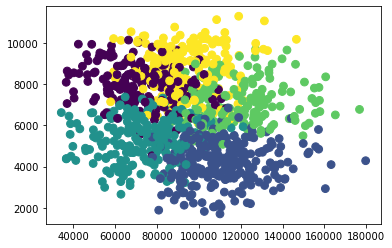

In [40]:
plt.scatter(df_clus['basePay'], df_clus['bonus'], 
            c=kmeans.labels_, s=60)

C:\Users\DELL\AppData\Local\Temp\ipykernel_51056\1431149250.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


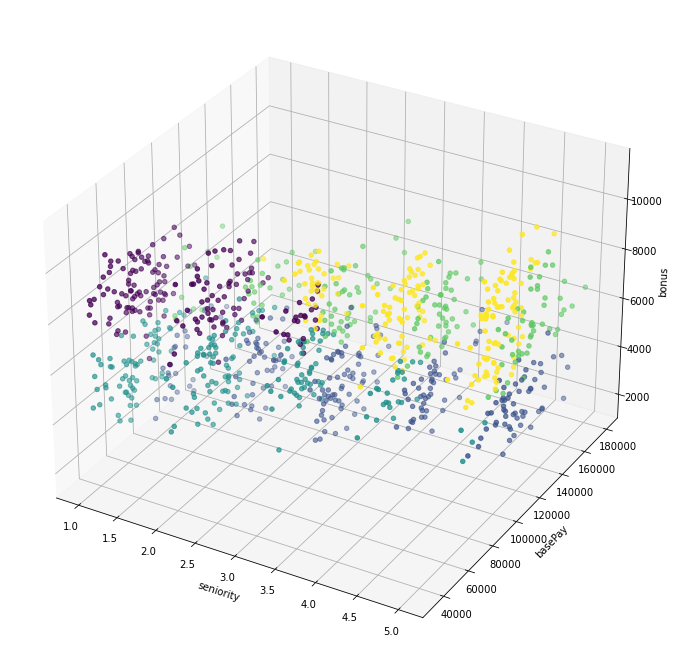

In [41]:
x = 'seniority'
y = 'basePay'
z = 'bonus'

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df_clus[x],
           df_clus[y],
           df_clus[z],
           c=kmeans.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

K-Means with MinMax

In [42]:
scaler = MinMaxScaler()
minmax_df_clus = scaler.fit_transform(df_clus.values)

In [43]:
kmeans_2 = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans_2.fit(minmax_df_clus)

KMeans(max_iter=500, n_clusters=5, n_init=50)

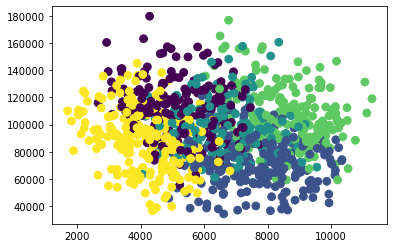

In [44]:
plt.scatter(df_clus['bonus'], df_clus['basePay'], 
            c=kmeans_2.labels_, s=60)

Hierarchical Clustering

In [45]:
df_clus.columns

Index(['age', 'perfEval', 'seniority', 'basePay', 'bonus'], dtype='object')

In [46]:
df_h = df_clus[['seniority','basePay','bonus']]
df_h = df_h[0:5000]

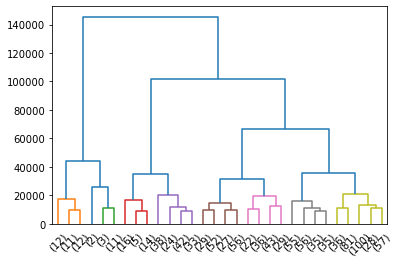

In [47]:
data_dist = pdist(df_h, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=25000, truncate_mode='lastp')